In [1]:
import pandas as pd
from bunkatech.semantics.bourdieu import Bourdieu
import bamboolib
pd.options.mode.chained_assignment = None

import numpy as np
import random

data = pd.read_csv(
    "/Users/charlesdedampierre/Desktop/ENS Projects/imaginary-world/db_film_iw (2).csv",
    index_col=[0],
)

In [2]:
bourdieu = Bourdieu(data = data, text_var = 'description', index_var = 'imdb')

In [ ]:
bourdieu.fit(extract_terms = True,
            docs_embedding = False, 
            terms_embedding = True, 
            sample_size_terms = 5000, 
            terms_limit =3000,
            terms_ents = False,
            terms_ngrams = (1,2),
            terms_ncs = False,
            language = 'en')

Extract Terms:   5%|██▍                                           | 270/5000 [00:02<00:48, 98.41it/s]

In [ ]:
bourdieu.bourdieu_projection_unique(projection_1 = ['good', 'bad'], 
                                    type = 'documents', 
                                    height = 500, 
                                    width = 1000, 
                                    dispersion = True)


In [ ]:
bourdieu.bourdieu_projection(projection_1 = ['good', 'bad'], 
                             projection_2 =  ['young', 'old'], 
                             type = 'documents', 
                             height = 500, 
                             width = 1000)


In [8]:
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objs as go
df = bourdieu.terms_embeddings
from sklearn.metrics.pairwise import cosine_distances

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

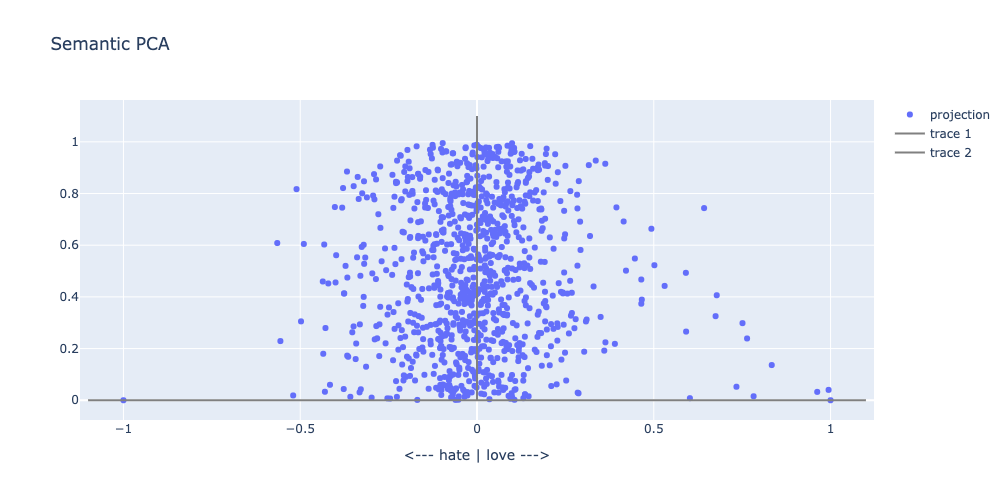

In [25]:
projection_2 = None

if projection_2 is None:

    projection_1 = ['love', 'hate']
    projection_str_1 = "-".join(projection_1)


    df_bert = bourdieu.compute_projection_embeddings(projection_1)
    df_proj = df_bert[projection_1]

    df_proj[projection_str_1] = df_proj[projection_1[0]] - df_proj[projection_1[1]]

    scaler = MinMaxScaler(feature_range=(-1, 1))
    df_proj["term"] = df_proj.index


    scaler = MinMaxScaler(feature_range=(-1, 1))
    df_proj[projection_str_1] = scaler.fit_transform(
        df_proj[projection_str_1].values.reshape(-1, 1)
    )
    
df_proj['project_angle'] = np.sqrt(1-df_proj[projection_str_1]**2) # Pythagore
#df_proj['project_angle'] = df_proj['project_angle'].apply(lambda x: np.sqrt(1-x**2)*(1+random.random()*0.1))
df_proj['project_angle'] = df_proj['project_angle'].apply(lambda x: x*random.uniform(0, 1))

fig = go.Figure()

trace_1 = go.Scatter(
    x=[-1.1, 1.1],
    y=[0, 0],
    mode="lines",
    line_color="grey")


trace_2 = go.Scatter(
    x=[0, 0],
    y=[0, 1.1],
    mode="lines",
    line_color="grey")

trace_scatter = go.Scatter(
    x=df_proj[projection_str_1],
    y=df_proj['project_angle'],
    text = df_proj['term'],
    mode="markers",
    name = 'projection')

fig.add_trace(trace_scatter)
fig.add_trace(trace_1)
fig.add_trace(trace_2)


fig.update_layout(
        title='Semantic PCA',
        height=500,
        width=1000,
        xaxis_title="<--- " + " | ".join(reversed(projection_1)) + " --->",
    )

fig.show()

In [17]:
test = bourdieu.df_fig
test

,description,praise-criticism,young-old,bestfit
0,"""Mr. Church"" tells the story of a unique frien...",0.235870,0.532834,0.024144
1,"""Popeye"" Doyle travels to Marseille to find Al...",0.124937,0.115911,0.065367
2,"""Rambo"" parody in which Topper Harley leads a ...",0.231454,-0.072415,0.025785
3,"""THE TRAP"" is a modern film noir reflecting th...",0.379468,-0.031533,-0.029218
4,"10 years after finishing college, two best fri...",0.482891,-0.193012,-0.067651
...,...,...,...,...
3338,Years after walking away from her past as a yo...,0.220035,0.004142,0.030028
3339,Young Albert enlists to serve in World War I a...,-0.000408,-0.088549,0.111946
3340,Young Danny Flynn is released from prison 14 y...,0.378587,-0.894217,-0.028891
3341,Young employees at Shenaniganz restaurant coll...,0.142691,0.802801,0.058770


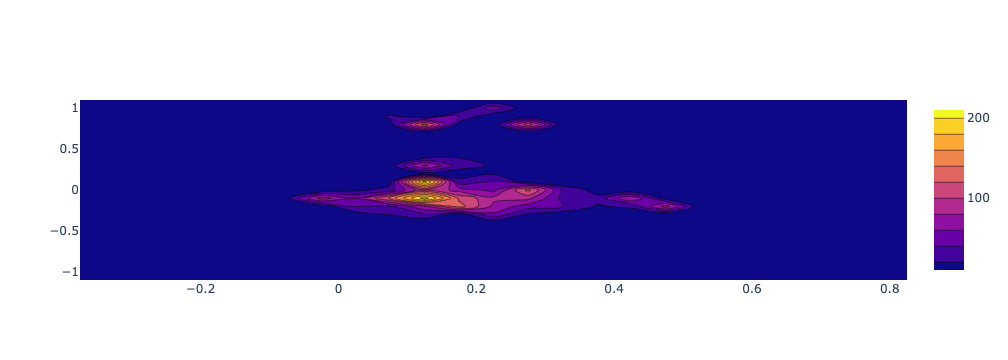

In [28]:
fig = go.Figure()


main_trace = go.Histogram2dContour(
        x = test["praise-criticism"],
        y = test["young-old"]
)

fig.add_trace(main_trace)


fig.show()